# Exercise 1 - Discrete random variable
Let X ∼ ZTB(n, p) be a random variable following a Zero-Truncated Binomial Distribution in which:
- n ∈ N is the number of Bernoulli trials.
- p ∈ (0, 1) is the probability of success on a single trial.

Then, the probability mass function (PMF) is defined as:
$$P(X=k) = \frac{{n \choose k} p^k (1-p)^{n-k}}{1-(1-p)^n}\; \mathrm{, for}\; k=1,2,\dots,n$$

Assuming $n = 14$ and $p = 0.15$.

(1) Write the R functions for the PMF and cumulative distribution (CDF), using the R naming convention.

In [1]:
PMF <- function (n,k,p) {
    # k has to be in (1,n)
    return( (choose(n,k) * (p**k) * (1-p)**(n-k)) / (1-(1-p)**n) )
}
CDF <- function (n,k,p) {
    # k has to be in (1,n)
    if (length(k) == 1) {
        value_to_return <- k
        k <- 1:k
    } else {
        value_to_return <- k
    }
    return(cumsum(PMF(n,k,p))[value_to_return])
}

(2) Produce two plots showing the PMF and CDF, separately.

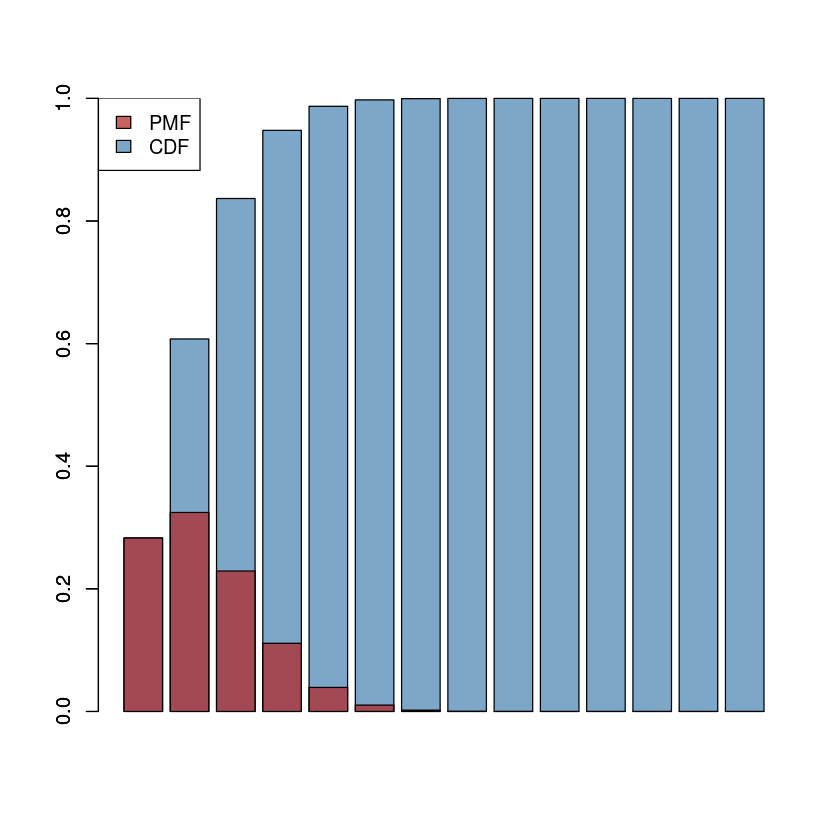

In [2]:
n <- 14
list_k <- 1:n
p <- 0.15

pmf_values <- PMF(n,list_k,p)
cdf_values <- CDF(n,list_k,p)

barplot(cdf_values, col=adjustcolor("steelblue", alpha=.7))
barplot(pmf_values, col=adjustcolor("firebrick", alpha=.7), add=TRUE)
legend("topleft", legend=c("PMF","CDF"), fill=adjustcolor(c("firebrick", "steelblue"), alpha=0.7))

(3) Compute the mean value and variance of the ZTB distribution using R. Compare the obtained values with the analytical statistical moments for the zero-truncated and the standard binomial distributions.

In [3]:
# mean value and variance of ZTB
mean_ztb <- sum(list_k * pmf_values)
var_ztb <- sum((list_k - mean_ztb)**2 * pmf_values)

# expected value and variance for standard binomial distributions
mean_bd = n * p
var_bd = n * p * (1 - p)

cat("Mean ZTB:", mean_ztb, "Mean binomial distribution:", mean_bd)
cat("\nVariance ZTB:", var_ztb, "Variance binomial distribution:", var_bd)

Mean ZTB: 2.340536 Mean binomial distribution: 2.1
Variance ZTB: 1.426472 Variance binomial distribution: 1.785

(4) Generate a sample of random numbers from this distribution, show them in an histogram, and evaluate the sample mean.

Mean samples: 2.3326

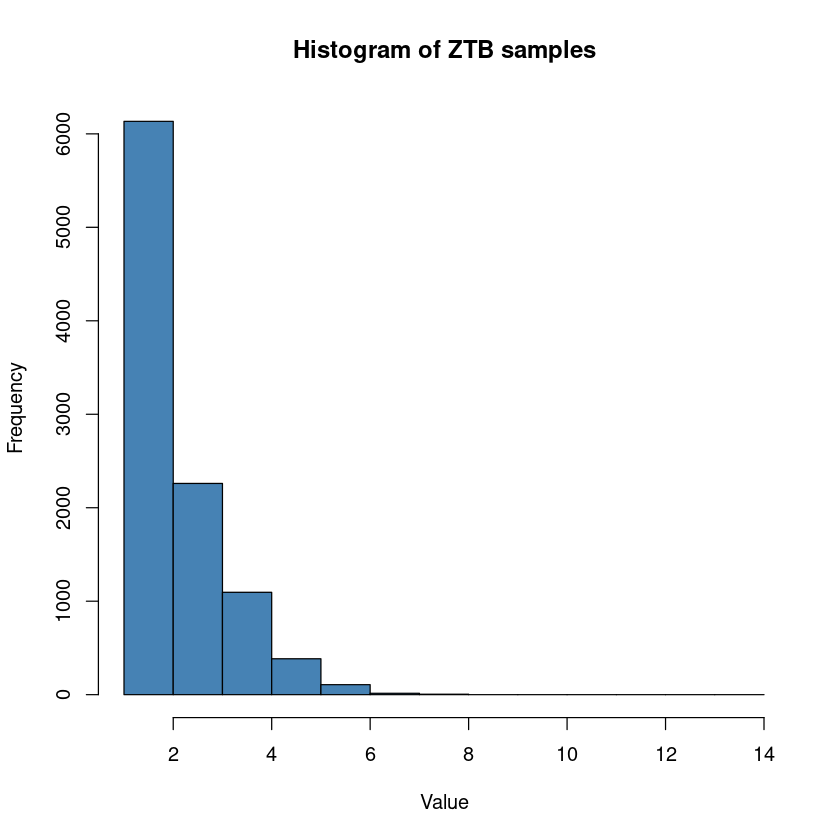

In [4]:
N <- 10000
samples <- rbinom(N, n, p)
samples <- samples[samples != 0]

while (length(samples) < N) {
    new_value <- rbinom(1, n, p)
    if (new_value != 0) {
        samples <- c(samples, new_value)
    }
}

mean_samples <- mean(samples)

hist(
    samples,
    breaks=1:n, xlab="Value", main="Histogram of ZTB samples",
    col="steelblue",
)
cat("Mean samples:", mean_samples)


# Exercise 2 - Continuous Random Variable
The energy distribution of CR muons at sea level can be approximated as follows
$$
p(E) = N \begin{cases}
1 & \text{for } E < E_0 \\
(E - E_0 + 1)^{-\gamma} & \text{for } E \ge E_0
\end{cases}
$$
where $E_0 = 7.25$ GeV and $\gamma = 2.7$.

(1) Compute the normalisation factor N using R.

In [5]:
E0 <- 7.25
gamma <- 2.7

p <- function(E, N=1){ifelse(E<E0, N, N*(E-E0+1)**(-gamma))}
integral1 <- integrate(p, lower=0, upper=E0)$value
integral2 <- integrate(p, lower=E0, upper=Inf)$value
N <- 1 / (integral1 + integral2)

cat("Normalization factor:", N)

Normalization factor: 0.1275797

(2) Plot the probability density function in R.

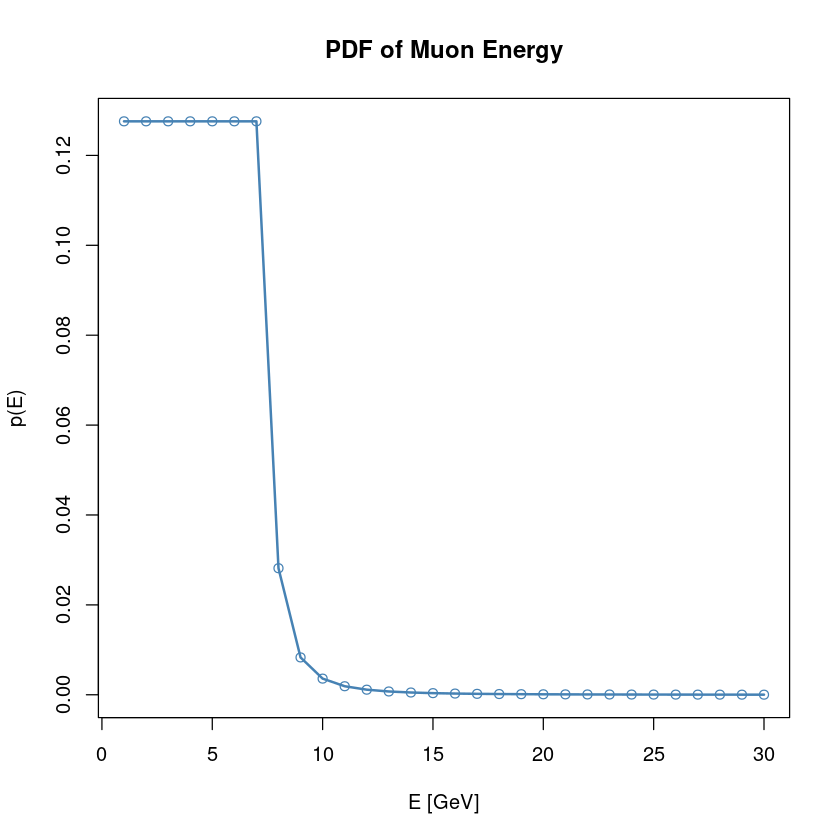

In [6]:
E_max <- 30
pdf_values <- p(1:E_max, N=N)
plot(pdf_values, col="steelblue",
     xlab="E [GeV]", ylab="p(E)", main="PDF of Muon Energy"
)
lines(pdf_values, col="steelblue", lwd=2
)

(3) Plot the cumulative density function in R.

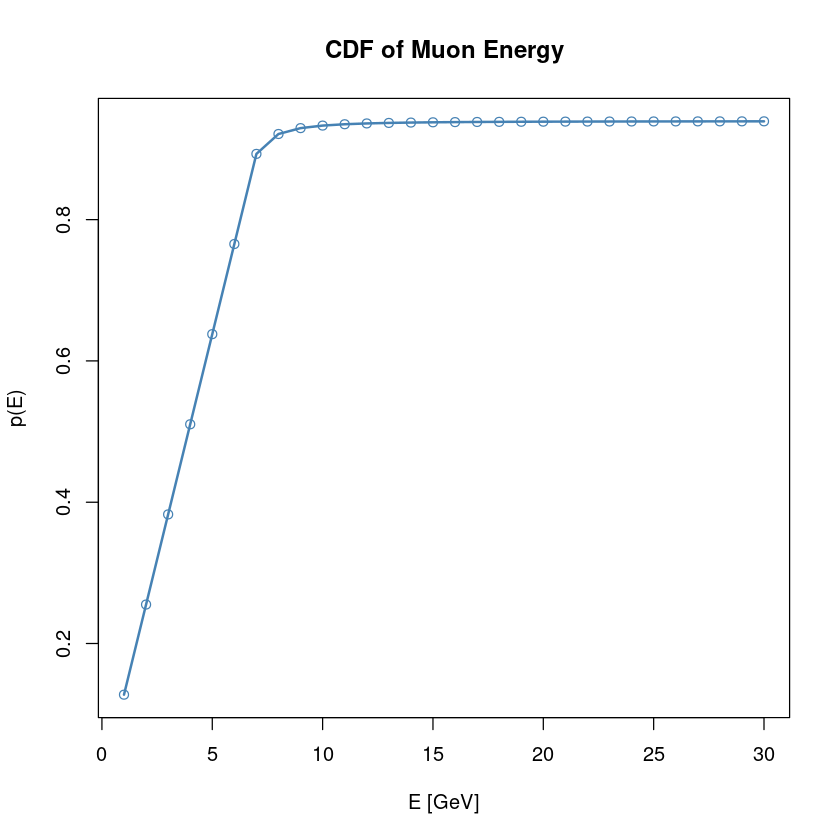

In [7]:
plot(cumsum(pdf_values), col="steelblue",
     xlab="E [GeV]", ylab="p(E)", main="CDF of Muon Energy"
)
lines(cumsum(pdf_values), col="steelblue", lwd=2
)

(4) Compute the mean value using R.

In [8]:
E_mean <- integrate(
    function(E) {E * p(E, N=N)},
    lower=0, upper=Inf
)$value
cat("E mean:", E_mean, "GeV")

E mean: 4.004252 GeV

(5) Generate $10^6$ random numbers from this distribution, show them in an histogram and superimpose the pdf (with a line or with a sufficient number of points).

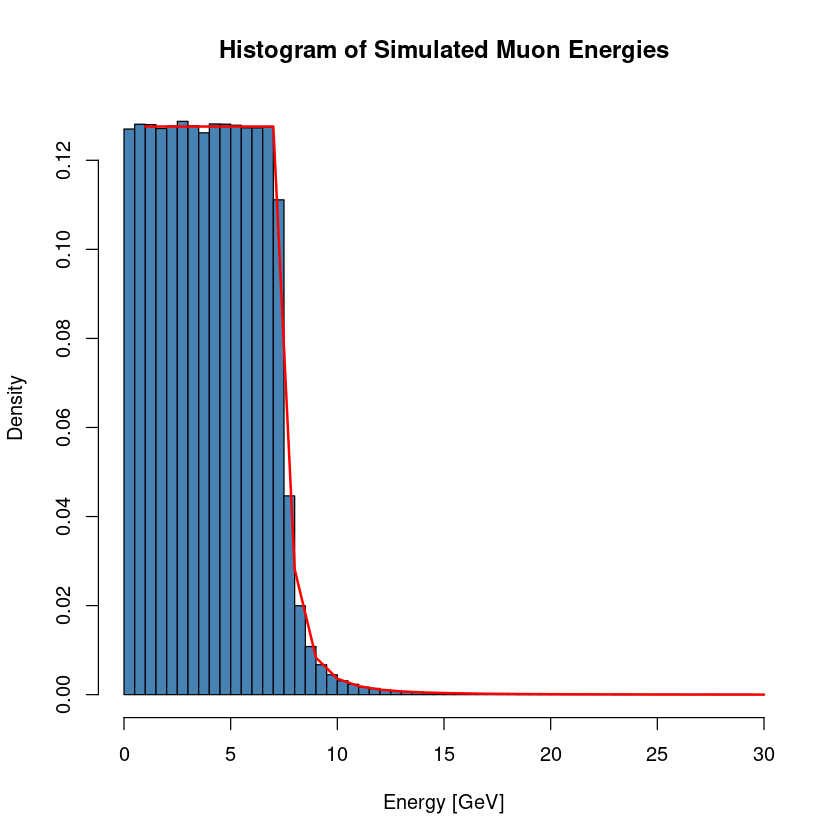

In [9]:
# I use the rejection sampling approach
N_samples <- 1e6
samples <- c()

# I pick f(E) such that f(E) > p(E) for every E: in this case f(E) = N.
# I integrate f(E) and find the inverse so that I can sample through uniform random numbers
while (length(samples)<N_samples) {
    E_candidate <- runif(N_samples, max=N*E_max) / N
    
    new_E <- E_candidate[runif(N_samples, max=N) < p(E_candidate, N=N)]
    samples <- c(samples, new_E)
}
samples <- samples[1:N_samples]

hist(samples, freq=FALSE, breaks=100,
    col="steelblue", xlab="Energy [GeV]", main="Histogram of Simulated Muon Energies")
lines(pdf_values, col = "red", lwd = 2)

# Exercise 3 - Web Server Requests
The average number of requests to a small web server is 7 per day.

(1) Find a bound for the probability that at least 30 web server requests will occur tomorrow.

In [10]:
markov_bound <- 7 / 30
cat("From Markov's inequality: P(X ≥ 30) ≤", markov_bound)

From Markov's inequality: P(X ≥ 30) ≤ 0.2333333

(2) Under regular conditions, the number of web server requests can be modeled as Poisson process, calculate the probability that at least 30 requests will occur tomorrow. Compare this value with the bound obtained in the previous point (1).

In [11]:
pois_prob <- 1 - ppois(30-1,7)
cat("Poisson probability: P(X ≥ 30) =", pois_prob, "≤", markov_bound, "(Markov bound)")

Poisson probability: P(X ≥ 30) = 9.982992e-11 ≤ 0.2333333 (Markov bound)

(3) Let the variance of the number of requests be 5 per day, find a bound on the probability that tomorrow at least 30 requests will occur.

In [12]:
chebyshev_bound <- 5 / (30-7)**2
cat("Chebyshev bound: P(X ≥ 30) ≤", chebyshev_bound)

Chebyshev bound: P(X ≥ 30) ≤ 0.009451796

# Exercise 4 - Photon Detector
A photon detector measures an average of 350 light particles per second with a standard deviation of 75 particles.\
How many minutes an experimentalist must run the detector to be 95% confident of collecting at least 1 million signals?

In [13]:
# TODO

# Exercise 5 - Rumor Spreading Process
Let a small community be composed of 1000 persons.\
Initially, 5 people know a rumor, and 995 people don’t.\
Every person who knows the rumor spreads it to one randomly chosen person, including those who already know it.

(1) Simulate how the rumor spreads over 15 interactions using R.

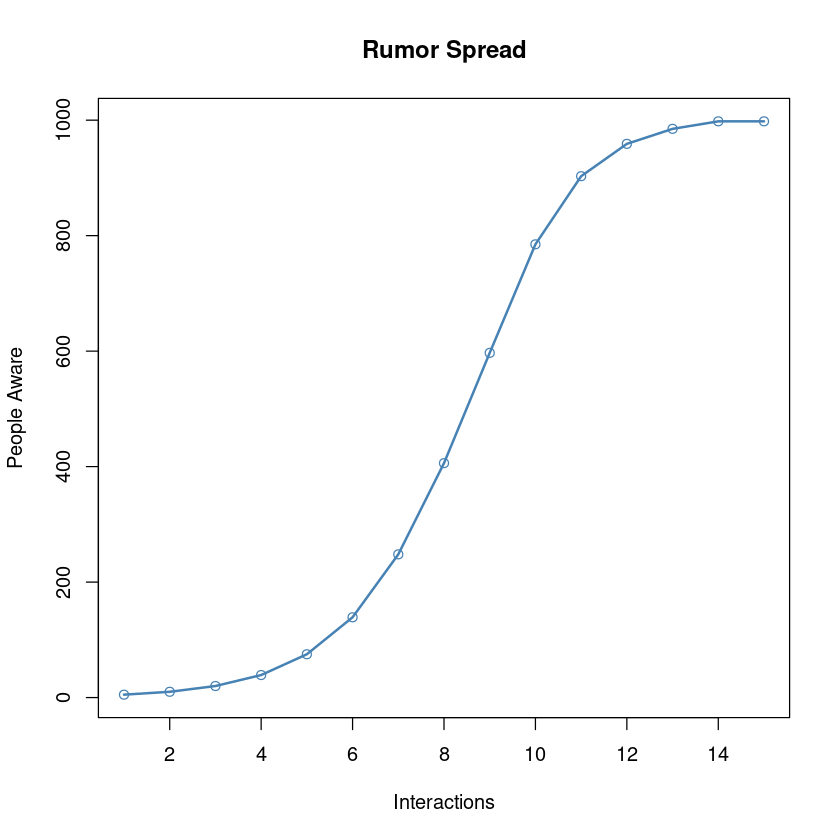

In [29]:
n_people <- 1000
n_interactions <- 15
n_starting_people <- 5

spread_rumor <- function() {
    people_aware <- sample(1:n_people,n_starting_people)
    know_rumor <- c(length(people_aware))

    for (i in (2:n_interactions)) {        
        new_targets <- sample(1:n_people, length(people_aware), replace = TRUE)
        people_aware <- unique(c(people_aware, new_targets))
        know_rumor[i] <- length(people_aware)
    }
    
    return(know_rumor)
}

evolution_spreading <- spread_rumor()
plot(evolution_spreading, col="steelblue", 
     xlab="Interactions", ylab="People Aware", main="Rumor Spread"
)
lines(evolution_spreading, col="steelblue", lwd=2)

(2) Evaluate the mean number of people know the rumor after 15 interactions.

Mean value: 998.045

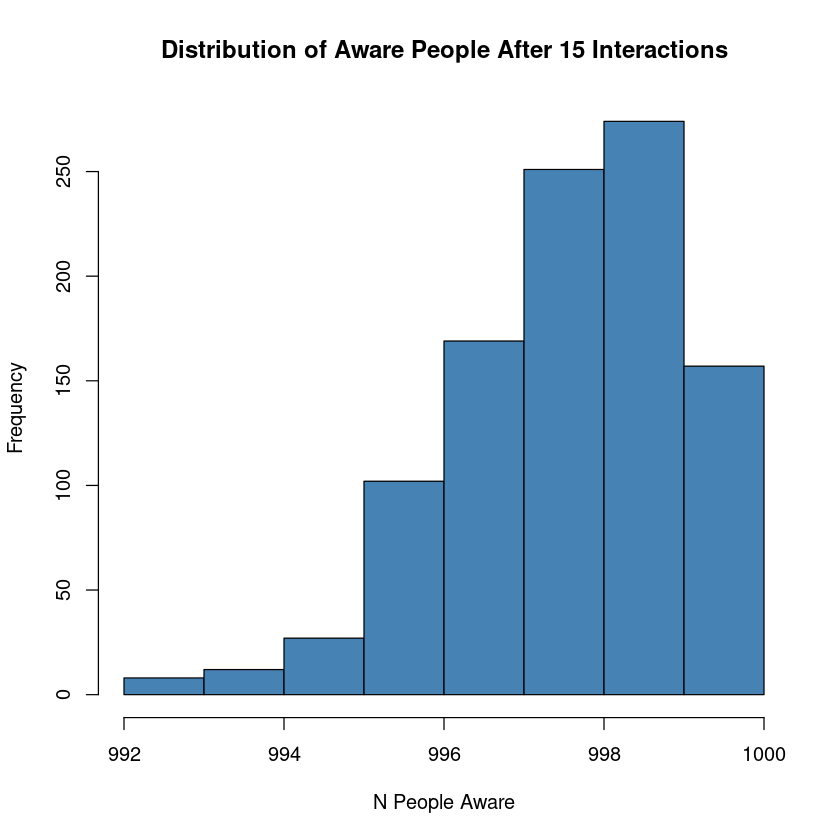

In [48]:
n_simulations <- 1000
last_interactions <- c()

for (i in 1:n_simulations) {
    people_aware_final <- spread_rumor()[n_interactions]
    last_interactions <- c(last_interactions, people_aware_final)
}

hist(last_interactions, col="steelblue",
      xlab="N People Aware", main="Distribution of Aware People After 15 Interactions"
)

mean_int15 <- mean(last_interactions)
cat("Mean value:", mean_int15)

(3) Find an upper bound for the probability of at least 500 persons know the rumor after 15 interactions.

In [69]:
prob <- mean(last_interactions >= 500)
cat("Empirical upper bound: P(X ≥ 500) ≈", prob)

Empirical upper bound: P(X ≥ 500) ≈ 1

# Exercise 6 - Passenger Arrivals
In a stationary bus at the departure station, a passenger gets on the bus, on average every 30 seconds.

(1) Compute the probability of getting more than 6 passenger after 2 minutes. Evaluate the probability of having less than 4 passenger after 3 minutes.

In [ ]:
# TODO

(2) Simulate the distribution of the arrival time of the third passenger and superimpose the corresponding pdf.

(3) Repeat the procedure of the point b) for the difference in arrival time between the fifth and the first passenger.